## Introduction by some words

Jupyter's computational notebooks were created as a way of putting a browser in front of... 
a way of running code that you now barely have to think about anymore.

The notebook itself is like a document you can save,
- containing chunks of marked-up explanations you can read.
- alongside chunks of python code you can run,
- and its output, often presented in a richer format (...rather than as data), is also kept


In some situations, you may only be able to view these notebooks.

In the right environment, you can also run the code in it yourself,
meaning you can more easily iterate on code started by someone else.

When you start running its code,
- you start a relatively-short-term session which remembers the output of what you were running,
- this lets you alter and retry moderate-sized chunks at a time (because it remembers the variables you've set within that session)
For a more technical technical introduction, and a "when and why might this be interesting to you," 
scroll down past the examples.

## Introduction by example

You are currently looking at a notebook. 

If you're viewing it on e.g. github, it's a view-only thing.

If you've clicked something like the following button: <a href="https://colab.research.google.com/github/WetSuiteLeiden/example-notebooks/blob/main/getting-started/notebooks_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> then you're viewing a copy on colab, and can click run buttons.

Right now, at a marked-up block, there will be code blocks following, with some output.

You could just _look_ at it, but the point is that you could take this and start running it _yourself_. 

For some exmaples of what you might put in and get out:

Topical for this project: Spacy is a package for text analysis, doing some NLP work (more on it in [a separate notebook on spacy](../research-methods/methods_nlp__spacy_basics.ipynb))

In [ ]:
!pip install --quiet spacy
!python3 -m spacy download nl_core_news_lg
# NOTE: THIS WILL INSTALL THINGS into the system you are running this on.
# 
# The next code blocks assume that spacy and the mentioned model are already installed. 
# If they are installed, skip this cell.  If they are not installed, run this cell.

In [3]:
import spacy

dutch_parser = spacy.load('nl_core_news_lg')        # load a specific language model,
analysed     = dutch_parser("Groene kaas is sterk") # give it a sentence,
for token in analysed:                              # have it say (some) of what each piece is.
    print( '%s/%s  '%(token.text, token.pos_) )

Groene/ADJ  
kaas/NOUN  
is/AUX  
sterk/ADJ  


In [4]:
# or, perhaps more usefully:
analysed = dutch_parser( "In afwijking van het derde lid geldt voor leerlingen met een indicatie voor leerwegondersteunend onderwijs voor wie de het samenwerkingsverband heeft bepaald dat zij op dit onderwijs zijn aangewezen een ratio leraar/leerling van 1/17,14." )
for nc in analysed.noun_chunks: 
    print(nc)

afwijking
het derde lid
leerlingen
een indicatie
leerwegondersteunend onderwijs
de het samenwerkingsverband
zij
dit onderwijs
een ratio
leraar/leerling


<Axes: title={'center': 'some data'}>

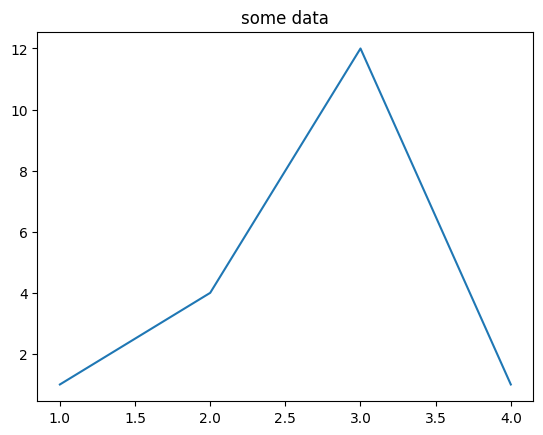

In [6]:
# Notebooks make visualisation easier, of data and of results
#   this plot is itself pointless, but serves to illustrate it's often just a few lines to nice graphics
import matplotlib.pyplot, random

fig, ax = matplotlib.pyplot.subplots()
ax.plot([1,2, 3,4],
        [1,4,12,1])
ax.set_title('some data')

display(ax)  # display() exists (only) in these notebook environments

Also, do a search for '[matplotlib gallery](https://matplotlib.org/stable/gallery/index.html)' to see further plots peope made.

There is also [pandas](https://pandas.pydata.org/docs/user_guide/visualization.html), 
and consider the somewhat more advanced seaborn - and similarly look for '[seaborn gallery](https://seaborn.pydata.org/examples/index.html)'


In [7]:
import seaborn, pandas    
# pandas to load into a table of sorts,
# seaborn happens to have some toy datasets -- see also  seaborn.get_dataset_names()

pandas_df = seaborn.load_dataset('taxis')[:3]   # seaborn.load_dataset returns a pandas dataframe,   
display( pandas_df )                            # which gets display()ed as a table
# 

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


## Notes on rich output

The packages mentioned above - [matplotlib](https://matplotlib.org/stable/gallery/index.html), [seaborn](https://seaborn.pydata.org/examples/index.html), and [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) - will often show their tables and plots nicely with little to no work, because their most central object (e.g. figure, dataframe) have been made aware aware of how to render to these notebooks.

(That rendered output is saved (e.g. as an embedded image) so is typically viewable when rendering that notebook elsewhere _without_ having to run its code again.)

Various other things are _not_ aware of notebooks. 
While often not worth the work, you _could_ roll your own, and there are a few examples of that in this repository (TODO: link to example)

In [9]:
# Sometimes it needs a _little_ more digging to get it to display
import spacy, spacy.displacy

doc = dutch_parser("Groene kaas is sterk")
spacy.displacy.render( doc, style='dep' )

array([[183,  15, 230,  81,  52, 211],
       [201,  26, 223, 223, 125,  84],
       [148, 148, 229, 242, 116, 148]], dtype=uint8)

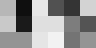

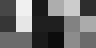

In [11]:
# You could roll your notebook visualisation for any data
#   e.g. numpy is about numbers in matrices, the below makes some choices to make that visual
class NumpyImage:
    ''' Takes an array of values assumed to already have useful values in 0..255 value range, and visualizes it as a grayscale image. 
        Each cell is represented by an 16-by-16 pixel square (by default) for visibility.'''
    def __init__(self, ary, pixelsize=16, invert=False):
        self.ary = numpy.array(ary) # copy
        self.ary[self.ary<0]   = 0 # clamp (before type conversion)
        self.ary[self.ary>255] = 255
        self.invert = invert
        self.pixelsize = pixelsize
    def _repr_png_(self):
        from PIL import Image, ImageOps
        import io, numpy
        im = Image.fromarray( numpy.uint8(self.ary) )
        if self.pixelsize != 1:
             im = im.resize( (im.size[0]*self.pixelsize, im.size[1]*self.pixelsize), resample=Image.NEAREST)
        if self.invert:
            im = ImageOps.invert( im )
        by = io.BytesIO()
        im.save(by,'png')
        return by.getvalue()

# test that:
import numpy
ary = (numpy.random.rand(3,6)*255).astype(numpy.uint8)
display( ary ) # how it would normally display
display( NumpyImage( ary ) )              # depending on whether you think high numbers should be white
display( NumpyImage( ary, invert=True ) ) # or black

...not that an image is interesting in the context of this project.

There are in the `research-methods` folder of visually marking marking up some sentences.

# Too many words on "when and why might you like to use it?"

Skim this for the angle that applies to you.

Like a physical notebook, they are easily used as history of of what you've tried - experiments, results - and show that to others.

The 'computational' means that the notebook might contain all the code snippets 
for someone else to take that document, run the same code snippets, in their own way on their own computer,
to reproduce, and/or to develop further.


**What it often makes easier**:
* sharing code
* sharing results
* visualizing some kinds of results (it renders plots, images, and more)
* sharing how far you got, for someone else to take over
* providing a solid basis for someone else to experiment with - can be great in educational settings
* when working on a longer thing, makes it easy to re-run "just the last part I'm working on" 
  without having to store that in intermediate files - though that is often equally valid (and sometimes even more flexible)


**What it is not**:
* a multi-user experience - it would be neat to have a collaborative editing thing, but it is not that. Even variants aimed more at "I can view your notebook after you're done with the workshop / your homework" add little more than 'authenticte so people only get at their own notebook'. So if you want to cooperate with someone,
  - you still need to do that youreself, e.g. 
    - ...or be okay with hand the document back and forth (possibly using code versioning to keep track of changes), and running all the parts again every time you do
    - sharing your screen physically or digitally

* a continually running service - you can't use it as a server, primarily just active interactive work.

What it **only sometimes is**:
* easily viewed anywhere
  - You may be able to view a notebook (e.g. github renders saved notebooks) non-interactively
  - google colab can view them and ideally also run them
  - but on your own PC you may need to spend a time installing things

* reproducable elsewhere - consider:
   - the environment it runs in is your own  (you may need to install things, and that _can_ be a pain),
   - data you load in is external to the document, so should be communicated separately, and/or stored somewhere public
   - the intermediate results are not stored (many calculations will use a database, shared drive, etc, which is external to the notebook), 
   ...so running it _exactly_ the same elsewhere is not made easier.
   That said, notebooks are still a more complete "here is a description of what you need to do to run it yourself" than most separate scripts are.

* easy to install or run for non-programmers  (or even for programmers sometimes)
  - Yes, if you pick one option from the list of "things that give you notebooks" and install that, the basics will be there
  - Yet "I need this package to do my work" can sometimes mean becoming your own sysadmin  (as often happens around programming) 
  - if something installs its own python environment to run these, that might either help or confuse further


* remote - there are ways to run notebooks on a remote server, which uses that server's resources, and its probably-stable environment of installed things
  - ...but this takes a little more up-front setup.
  - Because of the server-client nature of the implementation, it also lends itself to remote work, and to "hello people in my workshop, please  start a browser and go here to start working".
  - This can be useful to set up a well-defined environment with all necessities already there, rather than to futz with your own python installation each time.


* a session you can continue later - this varies on how it is run, but assume that if you load it, you are stating from scratch

## Interactive, but saveable;  like a shell, but redoable

For context, 
* interactive python usually means running `python` which gives you a prompt where you can run arbitrary things
  - but you save nothing (there is one big history of separate commands, but that's not very useful).

* once you start making larger data-processing projects, you might end up making lots of separate scripts that all do something with some intermediate files
  - but you may not remember wat they're doing, what order to run them in, etc.

* while developing code, you often alter just one functions and run it again.

* while doing data science, you often want to rerun an analysis without redoing all the data-load-and-polish


When 
- you want to re-run larger parts of code without forgetting intermediate work,
- you want to return to a document that lets you think in those larger chunks
...then notebooks may fill a niche for you.


## Environments that make notebooks easier to use

* colab - added its its own thing, but leaning heavily on its notebooks origins

* VScode - [with an extension](https://code.visualstudio.com/blogs/2021/11/08/custom-notebooks)

* Spyder - [in theory?](https://docs.spyder-ide.org/current/plugins/notebook.html)

* pycharm - https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html



## How does a session actually work, how long does it last?

This varies, now that there are increasing amounts of takes on notebooks. 

In particular the editors-that-make-it-easher may change things a little.

* it seems the original idea was we run a command in a shell (`jupyter notebook`). 
  - This basically ran until you quit it, whether a web browser was currently interacting with it or not.

* programming environments may try to give you more features
  - they may also try to automate starting a session when you start running things 
  - and stopping it once you've close the tab for the notebook.
  - Rather useful, doesn't quite match the previous behaviour, so is useful to know about
